<img style="float: left; padding-right: 10px; width: 45px" src="https://upload.wikimedia.org/wikipedia/fr/b/b1/Logo_EPF.png?raw=true"> 

# Introduction to Machine Learning
**P2024: Data engineering**<br>


## Lab 2:  Feature engineering

### First name: Haoyu
### Last name: Wang
### Group: DEA 1


---

**Challenge definition**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [131]:
import pandas as pd

df = pd.read_csv('titanic.csv', sep = ',')
df.set_index('PassengerId', inplace = True, drop = True)
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### **Overview of the data**
* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The dataset has some null values that we will need to deal with.

**First model: Quick and dirty**

A very important point in Machine Learning and Data Science is to rapidly build a first model that can serve as baseline. 

With the first model in place, then we can appreciate adding new features and use new algorithm and see effects on performances.

We can see that at least `Fare`, `SibSp` and `Parch` are immidiately usable for modelling. In fact they are int/float and they don't have null values.

In [133]:
def parse_model_0(X: pd.DataFrame) -> (pd.DataFrame, pd.Series):
  target = X.Survived
  X = X[['Fare', 'SibSp', 'Parch']]
  return X, target

In [134]:
X, y = parse_model_0(df.copy())

In [135]:
X.head(10)

,Fare,SibSp,Parch
PassengerId,,,
1,7.2500,1,0
2,71.2833,1,0
3,7.9250,0,0
4,53.1000,1,0
5,8.0500,0,0
6,8.4583,0,0
7,51.8625,0,0
8,21.0750,3,1
9,11.1333,0,2


At this stage we need a way to asses model's performance. We will use this function which does a `cross validation`, we will see in details how we validate models in the next lecture, let's just this method for the moment.

In [136]:
from sklearn.model_selection import cross_val_score
import numpy as np

def compute_score(clf, X: pd.DataFrame, y: pd.Series) -> float:
  xval = cross_val_score(clf, X, y, cv = 5)
  return np.mean(xval)

In [137]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()
compute_score(logisticRegression, X, y)

0.6746092524009792

## **Feature engineering** 

**Exploratory data analysis: EDA**

EDA is a very important step to detect good features to add to a machine learning model. We will implement a method to plot feature distribution and we will do a simple EDA on a variable.

You can re-use this method for the open ended part of the lab.

In [138]:
# split data survived and not survived
survived = df[df.Survived == 1]
dead = df[df.Survived == 0]

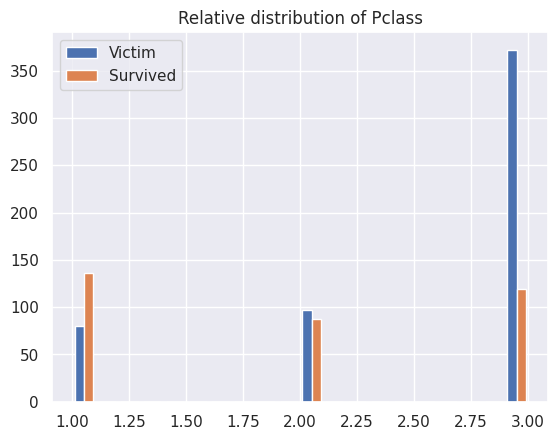

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

# observe distribution of variables of these two populations
def plot_hist(feature, bins = 20):
  x1 = np.array(dead[feature].dropna())
  x2 = np.array(survived[feature].dropna())
  plt.hist([x1, x2], label = ['Victim', 'Survived'], bins = bins)
  plt.legend(loc = 'upper left')
  plt.title('Relative distribution of {}'.format(feature))
  plt.show()

# exemple on Pclass
plot_hist('Pclass')

**Question :** What conclusions can you draw from this graph ?

We can see that the client from first class survived more than other class, we can guess that this is because of the different positions on the ship or the equipement that they have but not for 2nd or 3rd class.

**Answer here** :

In [140]:
# let's use this new variable in the model
def parse_model_1(X):
  target = X.Survived
  class_dummies = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
  X = X.join(class_dummies)
  to_delete = ['Name', 'Age', 'Sex', 'Cabin', 'Embarked', 'Survived', 'Ticket', 'Pclass']
  for column in to_delete:
    del X[column]
  return X, target

In [141]:
X, y = parse_model_1(df.copy())
X.head(10)

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,
1,1,0,7.2500,0,0,1
2,1,0,71.2833,1,0,0
3,0,0,7.9250,0,0,1
4,1,0,53.1000,1,0,0
5,0,0,8.0500,0,0,1
6,0,0,8.4583,0,0,1
7,0,0,51.8625,1,0,0
8,3,1,21.0750,0,0,1
9,0,2,11.1333,0,0,1


In [142]:
logisticRegression = LogisticRegression()
compute_score(logisticRegression, X, y)

0.6937040989266211

**Weights of each feature**

In [143]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X, y)
print(logisticRegression.coef_)

[[-0.15072925  0.23372253  0.00675618  0.37803728  0.10814039 -0.84382307]]


Let's implement a method to plot feature weights in case of Logistic Regression

{
  "SibSp": -0.15072925216811442,
  "Parch": 0.23372252584039654,
  "Fare": 0.006756177054453502,
  "Pclass_1": 0.37803727531866455,
  "Pclass_2": 0.10814038814915354,
  "Pclass_3": -0.8438230719680093
}


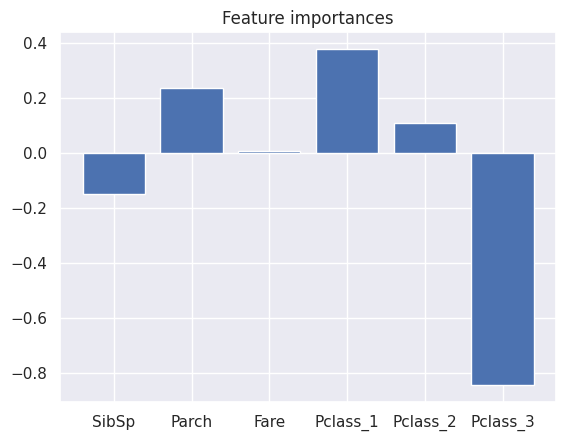

In [144]:
import json

def plot_var_weights_logistic_regression(X, y):
  lr = LogisticRegression()
  lr.fit(X, y)

  columns = np.array(X.columns)
  weights = np.array(lr.coef_[0])

  # weights dictonary sorted by absolute value
  weights_dict = dict(zip(columns, weights))
  print(json.dumps(weights_dict, indent = 2))

  # plot the weights
  plt.bar(columns, weights)
  plt.title('Feature importances')
  plt.show()

plot_var_weights_logistic_regression(X, y)

**Interpretation of weights in Linear Models**


*   A positive weight increases the probability of `target` = 1 (survived)
*   A negative weight decreases the probability of surviving
*   When a weight is close to zero, it means that the correspond feature doesn't influence the predictio

**Conclusion for our model**
`Pclass_1` and `Pclass_3` seem very important in our model in comparison to `Pclass_2`. It shows also that Fare is not important for our prediction using a linear model.

<br>

Let's continue with other variables

###**Children and women first !**

The history of the titanic reports that they were different rescue policies led by officer Charles Lightholler and officer William Murdoch. They didn't have the same interpretation of "children and women first". 

In fact, Murdoch, starboard side, was giving the priority but not the exclusivity to children and women. He let men onboard the rescue boats to fill the boards instead of waiting for the arrival of additional children and women.

On the other side, Lightholler, refused all men and prefered waiting for children and women to fill the lifeboats. Unfortunately, this second strategy was not optimal as they were only 500 children and women but they were 1200 seats on the rescue boats...




**Exercise**

Do statistics on `Sex` and `Age` features and then include them in a LogisticRegression model. Have a look at the score and feature importances, then interpret the results.

Nota : The `Age` variable has missing values, at this stage you can just fill null values with the median age. We will see later how we can better fill those missing values.

model score： 0.7867553825874083
{
  "SibSp": -0.3503943196653028,
  "Parch": -0.10554198307756836,
  "Fare": 0.003518276387700691,
  "Pclass_1": 1.1910723625708863,
  "Pclass_2": 0.23194331681562325,
  "Pclass_3": -0.8334542582243492,
  "Sex_female": 1.6424076057359425,
  "Sex_male": -1.0528461845737904,
  "Age": -0.03794327616909054
}


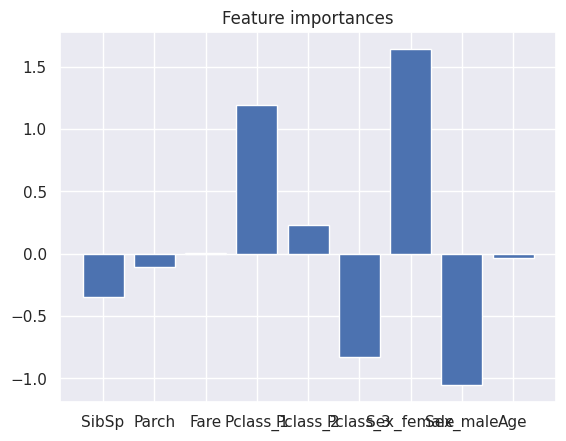

In [145]:
#### CODE HERE ####
df['Age'].fillna(df['Age'].median(), inplace=True)
sex_counts = df['Sex'].value_counts()
age_counts = df['Age'].value_counts()
sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')
X = pd.concat([X, sex_dummies, df['Age']], axis=1)
logisticRegression = LogisticRegression()
logisticRegression.fit(X, y)
score = compute_score(logisticRegression, X, y)
print("model score：", score)
plot_var_weights_logistic_regression(X, y)


**Exercise**

Use `plot_hist` method on `Age` and then define a new feature `is_child` when `Age` is less than some threshold. Does it improve the model's score ?

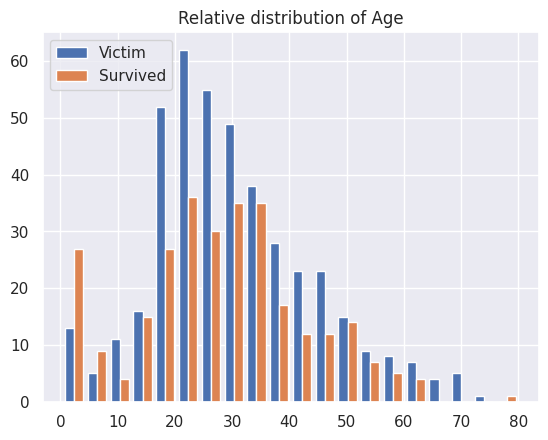

In [146]:
#### CODE HERE ####
# plot
plot_hist('Age')



In [147]:
#### CODE HERE ####

df['is_child'] = np.where(df['Age'] < 18, 1, 0)
X, y = parse_model_1(df.copy())
X['is_child'] = df['is_child']
logisticRegression.fit(X, y)
score = compute_score(logisticRegression, X, y)
print("model score：", score)

model score： 0.7060259870692361


Yes, we can see that the model score improved

**Conclusion**

What we just did with the new feature `is_child` is add non-linearity that a linear model like Logistic Regression can't capture without our help.

Let's try non-linear models. **However, remember that creating new features manually is still the best method to get the best results and performances out of models.**

**Exercise : Random Forest to the rescue**

Use a Random Forest classifier with the features we defined above but do not use `is_child` yet.

In [148]:
#### CODE HERE ####
from sklearn.ensemble import RandomForestClassifier

X, y = parse_model_1(df.copy())

randomForest = RandomForestClassifier()

score = compute_score(randomForest, X, y)
print("RandomForest score:", score)


RandomForest score: 0.697012114744837


As you may know, when using Decision Tree, we no longer have the weights of variables which is not ideal and hurts our model's interpretability.

However we can use a feature importances method that comes with Random Forst classifiers in sklearn. It computes the relative importance of features. This method should be added to your toolbox, it will allow you to somewhat interpret the results of your Random Forest.

**Exercise**

Compute feature importances of your Random Classifier model and interpret the results. How does it compare to the linear model ? Do both models select the same features as important ? Why ?

You can find documentation here https://mljar.com/blog/feature-importance-in-random-forest/

SibSp: 0.0753373699531008
Parch: 0.07837581151225832
Fare: 0.6631908288015506
is_child: 0.04728626983480644
Pclass_1: 0.05523140624047794
Pclass_2: 0.01767603747624386
Pclass_3: 0.06290227618156215


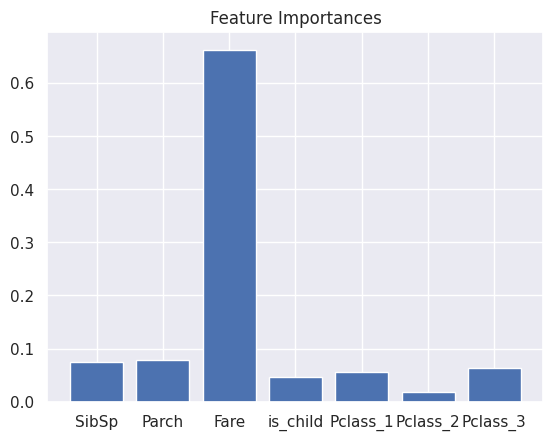

In [149]:
#### CODE HERE ####
randomForest = RandomForestClassifier()

randomForest.fit(X, y)

feature_importances = randomForest.feature_importances_

for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

plt.bar(X.columns, feature_importances)
plt.title('Feature Importances')
plt.show()


SibSp: 0.07673082827182016
Parch: 0.07762385621303888
Fare: 0.6665225708910961
is_child: 0.045094097324795614
Pclass_1: 0.054189364932723694
Pclass_2: 0.01652400265946854
Pclass_3: 0.06331527970705704


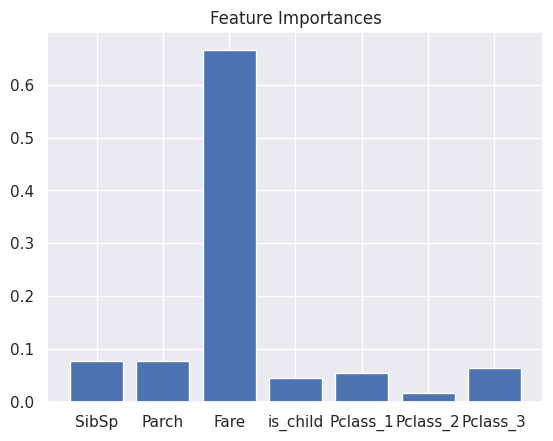

In [150]:
randomForest = RandomForestClassifier()
randomForest.fit(X, y)

feature_importances = randomForest.feature_importances_

for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

plt.bar(X.columns, feature_importances)
plt.title('Feature Importances')
plt.show()


**Open ended question**

Use other variables using techniques we have seen in the course and some creativity on existing variables.

Do EDA on variables to argument your choices, use plots, correlation etc...


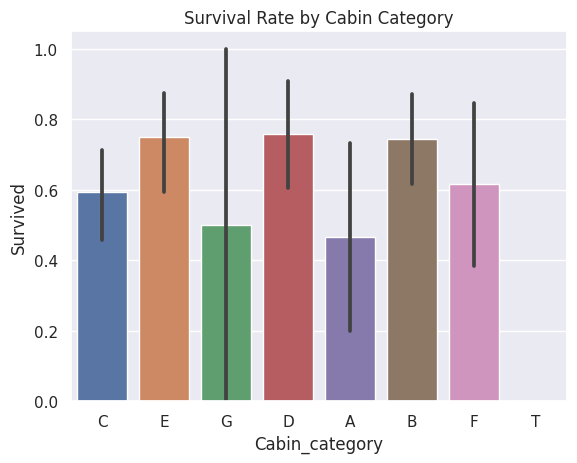

Average Score: 0.6423170731707317


In [130]:
#### CODE HERE ####
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = df.dropna(subset=['Cabin'])
df['Cabin_category'] = df['Cabin'].str[0]
cabin_list = df['Cabin'].str.split(' ')

# 创建包含所有可能船舱号码的列表
all_cabins = set([cabin for sublist in cabin_list for cabin in sublist])

# 为每个船舱号码创建对应的二进制特征
for cabin in all_cabins:
    df['Cabin_' + cabin] = df['Cabin'].apply(lambda x: int(cabin in x))

# 删除原始的'Cabin'列
df.drop('Cabin', axis=1, inplace=True)
# EDA和可视化
# 船舱类别与存活率的关系
sns.barplot(x='Cabin_category', y='Survived', data=df)
plt.title('Survival Rate by Cabin Category')
plt.show()

# 相关性分析
correlation = df[['Cabin_category', 'Survived']].corr()

# 特征工程
# 根据分析结果，创建新特征并将其转换为数值表示
cabin_category_dummies = pd.get_dummies(df['Cabin_category'], prefix='Cabin')
df = pd.concat([df, cabin_category_dummies], axis=1)

# 建模和评估
# 准备特征矩阵X和目标变量y
X = df[['Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T']]
y = df['Survived']

# 使用逻辑回归或其他分类算法建模并评估性能
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logistic_regression = LogisticRegression()
scores = cross_val_score(logistic_regression, X, y, cv=5)
average_score = scores.mean()

print("Average Score:", average_score)
